In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('nw6_data_price_fut_years_prediction.csv', index_col=0)
sales = sales.drop(['attributes', 'postcode'], axis = 1)

# The current renting data is segmented by beds until 3 and then is 4 or more. 
# We need to adjust the selling data for that
sales = sales[sales['beds']<5]
#sales.loc[sales['beds']>=4,'beds'] = 4

In [3]:
rents = pd.read_csv('nw6_data_rent_prev_years_prediction.csv', index_col=0).rename(columns={'price': 'rent'})


#sell_data = sell_data.groupby(['beds','year'])['price'].mean().reset_index()

full_data =  sales.merge(rents, on=['beds', 'year', 'year'])

full_data['yield'] = full_data['rent']*12/full_data['price']*100

full_data_s = full_data.drop(['address', 'date_x', 'date_y', 'baths', 'reception', 'href', 'type'],1)

In [4]:
full_data_s = full_data_s.drop_duplicates()
full_data_s = full_data_s.dropna()

/home/angel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


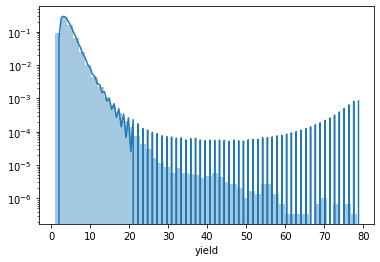

In [5]:
sns.distplot(full_data_s['yield'],hist_kws={'log':True})

Considering that a yield lower than 1% or greater than 7% can be considered an outlier, we have some of them in the data. THus, we will take them out.

In [6]:
full_data_s = full_data_s[(full_data_s['yield']>1)&(full_data_s['yield']<7)]
full_data_s = full_data_s.drop_duplicates()

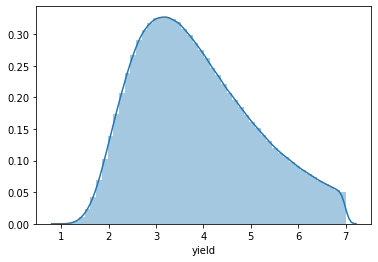

In [7]:
sns.distplot(full_data_s['yield'])

Now we have a (almost) normal distribution.

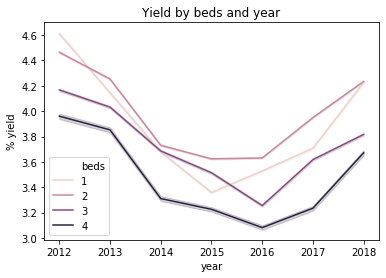

In [8]:
sns.lineplot(y='yield', x='year', data=full_data_s, hue='beds')
plt.title('Yield by beds and year')
plt.ylabel('% yield')
plt.show()

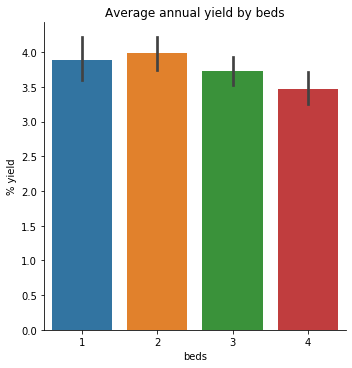

In [9]:
sns.catplot(data=full_data_s.groupby(['beds', 'year'])['yield'].mean().reset_index(), y='yield', x='beds',  kind="bar")
plt.title('Average annual yield by beds')
plt.ylabel('% yield')
plt.show()

In [10]:
full_data_s.groupby(['beds', 'year'])['yield'].mean().groupby('beds').mean()

beds
1    3.893435
2    3.983825
3    3.727032
4    3.476745
Name: yield, dtype: float64

In [11]:
full_data_s[(full_data_s['beds']==1)&(full_data_s['year']==2015)]

,beds,real_price_x,real_year_x,year,price,real_price_y,real_year_y,rent,yield
4135782,1,165000,2008,2015,249498.076464,1499,2019,970.082553,4.665764
4135786,1,165000,2008,2015,249498.076464,1525,2019,986.908535,4.746691
4135788,1,165000,2008,2015,249498.076464,1842,2019,1192.056080,5.733380
4135789,1,165000,2008,2015,249498.076464,1647,2019,1065.861218,5.126426
4135790,1,165000,2008,2015,249498.076464,1625,2019,1051.623849,5.057949
...,...,...,...,...,...,...,...,...,...
4346116,1,218000,2005,2015,441445.246168,2058,2019,1331.841157,3.620402
4346119,1,218000,2005,2015,441445.246168,1950,2019,1261.948619,3.430410
4346122,1,218000,2005,2015,441445.246168,1517,2019,981.731310,2.668683
4346125,1,218000,2005,2015,441445.246168,2145,2019,1388.143480,3.773451


In [12]:
sales[(sales['beds']==1)&(sales['year']==2015)]

,address,beds,real_price,date,real_year,year,price
40075,"Flat 4, Newhaven Court, 189 Willesden Lane",1,165000,2008-09-01,2008,2015,249498.076464
40076,24d Cambridge Avenue,1,290000,2008-06-01,2008,2015,438511.770755
40077,5a Sumatra Road,1,262000,2008-12-01,2008,2015,396172.703234
40078,3b Ariel Road,1,275000,2008-02-01,2008,2015,415830.127440
40079,"Flat 44, Kilburn Gate, Kilburn Priory",1,220000,2008-07-01,2008,2015,332664.101952
...,...,...,...,...,...,...,...
53243,78 Dyne Road,1,290000,2005-08-01,2005,2015,587243.676095
53244,23 Burton Road,1,175000,2005-11-01,2005,2015,354371.183850
53245,37b Princess Road,1,190000,2005-03-01,2005,2015,384745.856752
53246,14 Dobson Close,1,197000,2005-08-01,2005,2015,398920.704106


In [13]:
sales[(sales['beds']==1)&(sales['year']==2016)]

,address,beds,real_price,date,real_year,year,price
53387,"Flat 4, Newhaven Court, 189 Willesden Lane",1,165000,2008-09-01,2008,2016,250966.465764
53388,24d Cambridge Avenue,1,290000,2008-06-01,2008,2016,441092.576191
53389,5a Sumatra Road,1,262000,2008-12-01,2008,2016,398504.327455
53390,3b Ariel Road,1,275000,2008-02-01,2008,2016,418277.442940
53391,"Flat 44, Kilburn Gate, Kilburn Priory",1,220000,2008-07-01,2008,2016,334621.954352
...,...,...,...,...,...,...,...
66555,78 Dyne Road,1,290000,2005-08-01,2005,2016,590699.824304
66556,23 Burton Road,1,175000,2005-11-01,2005,2016,356456.790529
66557,37b Princess Road,1,190000,2005-03-01,2005,2016,387010.229717
66558,14 Dobson Close,1,197000,2005-08-01,2005,2016,401268.501338
